# Regression - how to fit functions to data

## Example (simple linear regression): TV and Deep Sleeping
Does watching TV has negative effects on the deep sleeping of children?
For nine kids of same age the length Y of deep sleep and the time X of TV consumption at the former day have been measured:

|    x   |   0.3  |   3.3  |   0.5  |   0.7  |   1.0  |   1.8  |   3.0  |   0.2  |   2.3  |
|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
|    y   |   5.8  |   4.4  |   6.5  |   5.8  |   5.6  |   5.0  |   4.8  |   6.0  |   6.1  |

Calculate the regression line and interprete the coefficients.

In [27]:
x=[0.3, 3.3, 0.5, 0.7, 1.0, 1.8, 3.0, 0.2, 2.3]
y=[5.8, 4.4, 6.5, 5.8, 5.6, 5.0, 4.8, 6.0, 6.1]
def f(x, a, b):
    return a*x+b

In [28]:
import scipy.optimize as opt
(a_, b_), _ = opt.curve_fit(f, x, y)
print(a_)
print(b_)

-0.4435643503513069
6.201188113779931


In [33]:
print(f'y = {a_:.2f}x + {b_:.2f}')

y = -0.44x + 6.20


$\Rightarrow$ for every hour a child is watching TV, it loses approx. $0.44$ hours of sleep

In [29]:
import numpy as np
n = 100
x_fit = np.linspace(0., 5., n)
y_fit = f(x_fit, a_, b_)

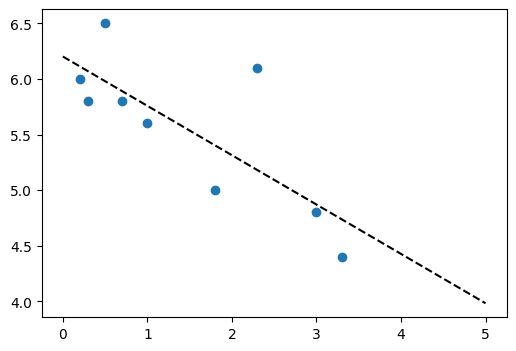

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x_fit, y_fit, '--k')
ax.plot(x, y, 'o')

### Interpretation
On average, a child without television has b hours of deep sleep, but for every hour of television, deep sleep time decreases by b hours.

## Example (nonlinear regression):
Assume that for parameters $a,b,c,d$ the true values of a function $$y=\frac{a}{1 + \exp(-c(x - d))) + b}$$ at $100$ equidistant points $x$ ranging from $-10$ to $10$ are perturbed by $0.2 \cdot a \cdot X$ for a normally distributed random variable $X$.

Fit the parameters $a,b,c,d$ to these perturbed values.

In [34]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [35]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [45]:
a, c = np.random.exponential(size=2) # just a random choice of parameters
b, d = np.random.randn(2)

In [46]:
n = 100
x = np.linspace(-10., 10., n)
y_model = f(x, a, b, c, d)
y = y_model + a * .2 * np.random.randn(n)

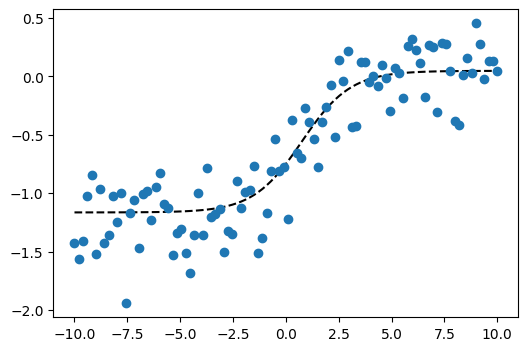

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')

In [48]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

In [49]:
y_fit = f(x, a_, b_, c_, d_)

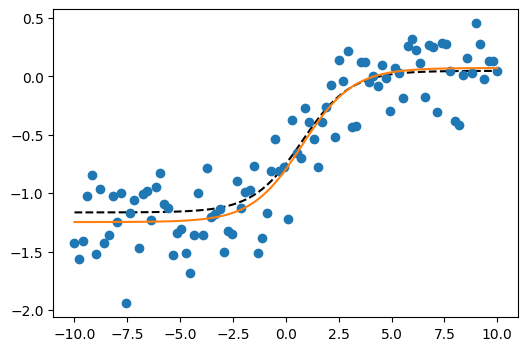

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')

## Aufgaben:
Lösen Sie die folgenden Aufgaben:

In [73]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([-5, -5, -4, -3, -3, 2, 3])

def f(x, a, b):
    return a*x+b

(a,b), _ = opt.curve_fit(f, x, y)
print(f'y = {a:.2f}x + {b:.2f}')

y = 1.39x + -6.32


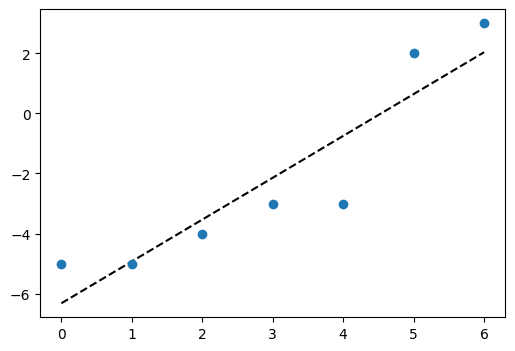

In [74]:
n = 100
x_fit = np.linspace(np.min(x), np.max(x), n)
y_fit = f(x_fit, a, b)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x_fit, y_fit, '--k')
ax.plot(x, y, 'o')

In [86]:
se = (f(x, a, b) - y) ** 2
print('squared errors:', se)

sum = np.sum(se)
print('sum =', sum)

mse = np.average(se)
print('mean squared error:', mse)

squared errors: [1.74617347 0.00510204 0.21556122 0.73469388 5.0625     1.84183673
 0.92984694]
sum = 10.535714285714285
mean squared error: 1.5051020408163265


In [88]:
def g(x, a, b, c):
    return a * x**2 + b*x + c

(a_g, b_g, c_g), _ = opt.curve_fit(g, x, y)
print(f'y = {a_g:.2f}x^2 + {b_g:.2f}x + {c_g:.2f}')

y = 0.27x^2 + -0.25x + -4.95


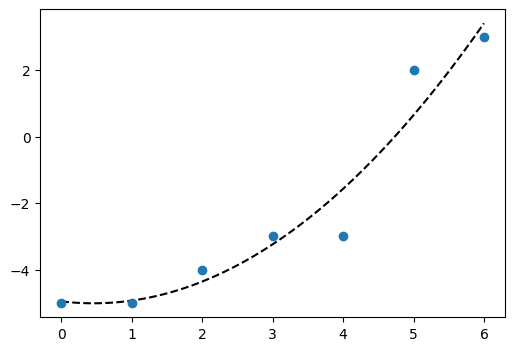

In [91]:
n = 100
x_fit = np.linspace(np.min(x), np.max(x), n)
y_fit = g(x_fit, a_g, b_g, c_g)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x_fit, y_fit, '--k')
ax.plot(x, y, 'o')

In [1]:
# import pyrope
# %pyrope run Regression.py